### **Necessary libraries and the MNIST dataset**

In [ ]:
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

     |████████████████████████████████| 109.3 MB 18 kB/s 
     |████████████████████████████████| 3.1 MB 26.7 MB/s 
     |████████████████████████████████| 488 kB 62.8 MB/s 
     |████████████████████████████████| 50 kB 7.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
tf.__version__

'1.14.0'

In [ ]:
mnist = input_data.read_data_sets("MNIST_data")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#### **Defining functions for the two networks. Both the networks have two hidden layers** 

In [ ]:
def generator(z, reuse = None):
    with tf.variable_scope('gen', reuse = reuse):
        hidden1 = tf.layers.dense(inputs = z, units = 128, 
                            activation = tf.nn.leaky_relu)
                              
        hidden2 = tf.layers.dense(inputs = hidden1,
           units = 128, activation = tf.nn.leaky_relu)
             
        output = tf.layers.dense(inputs = hidden2, 
             units = 784, activation = tf.nn.tanh)
          
        return output

In [ ]:
def discriminator(X, reuse = None):
    with tf.variable_scope('dis', reuse = reuse):
        hidden1 = tf.layers.dense(inputs = X, units = 128,
                            activation = tf.nn.leaky_relu)
                              
        hidden2 = tf.layers.dense(inputs = hidden1,
               units = 128, activation = tf.nn.leaky_relu)
                 
        logits = tf.layers.dense(hidden2, units = 1)
        output = tf.sigmoid(logits)
          
        return output, logits

### **Creating placeholders for the outputs**

In [ ]:
real_images = tf.placeholder(tf.float32, shape =[None, 784])
z = tf.placeholder(tf.float32, shape =[None, 100])
  
G = generator(z)
D_output_real, D_logits_real = discriminator(real_images)
D_output_fake, D_logits_fake = discriminator(G, reuse = True)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### **Defining the loss function**

In [ ]:
def loss_func(logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                          logits = logits_in, labels = labels_in))

In [ ]:
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9)
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))
D_loss = D_real_loss + D_fake_loss

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

In [ ]:
lr = 0.001 # learning rate
  
# Do this when multiple networks
# interact with each other
  
# returns all variables created(the two
# variable scopes) and makes trainable true
tvars = tf.trainable_variables() 
d_vars =[var for var in tvars if 'dis' in var.name]
g_vars =[var for var in tvars if 'gen' in var.name]
  
D_trainer = tf.train.AdamOptimizer(lr).minimize(D_loss, var_list = d_vars)
G_trainer = tf.train.AdamOptimizer(lr).minimize(G_loss, var_list = g_vars)
  
batch_size = 100 # batch size
epochs = 500 # number of epochs. The higher the better the result
init = tf.global_variables_initializer()
  
# creating a session to train the networks
samples =[] # generator examples

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        total_batch = int(60000/batch_size)
        print(total_batch)
          
        for i in range(total_batch):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images * 2-1
            batch_z = np.random.uniform(-1, 1, size =(batch_size, 100))
            _= sess.run(D_trainer, feed_dict ={real_images:batch_images, z:batch_z})
            _= sess.run(G_trainer, feed_dict ={z:batch_z})
              
        print("on epoch{}".format(epoch))
          
        sample_z = np.random.uniform(-1, 1, size =(1, 100))
        gen_sample = sess.run(generator(z, reuse = True),
                                 feed_dict ={z:sample_z})
          
        samples.append(gen_sample)

600
on epoch0
600
on epoch1
600
on epoch2
600
on epoch3
600
on epoch4
600
on epoch5
600
on epoch6
600
on epoch7
600
on epoch8
600
on epoch9
600
on epoch10
600
on epoch11
600
on epoch12
600
on epoch13
600
on epoch14
600
on epoch15
600
on epoch16
600
on epoch17
600
on epoch18
600
on epoch19
600
on epoch20
600
on epoch21
600
on epoch22
600
on epoch23
600
on epoch24
600
on epoch25
600
on epoch26
600
on epoch27
600
on epoch28
600
on epoch29
600
on epoch30
600
on epoch31
600
on epoch32
600
on epoch33
600
on epoch34
600
on epoch35
600
on epoch36
600
on epoch37
600
on epoch38
600
on epoch39
600
on epoch40
600
on epoch41
600
on epoch42
600
on epoch43
600
on epoch44
600
on epoch45
600
on epoch46
600
on epoch47
600
on epoch48
600
on epoch49
600
on epoch50
600
on epoch51
600
on epoch52
600
on epoch53
600
on epoch54
600
on epoch55
600
on epoch56
600
on epoch57
600
on epoch58
600
on epoch59
600
on epoch60
600
on epoch61
600
on epoch62
600
on epoch63
600
on epoch64
600
on epoch65
600
on epoch66
600
o

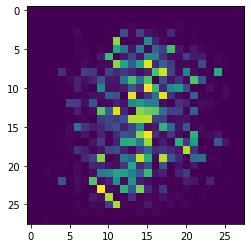

In [ ]:
# result after 0th epoch
plt.imshow(samples[0].reshape(28, 28))

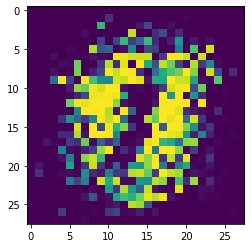

In [ ]:
# result after 250th epoch
plt.imshow(samples[25].reshape(28, 28))

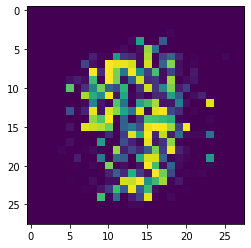

In [ ]:
# result after 499th epoch
plt.imshow(samples[100].reshape(28, 28))

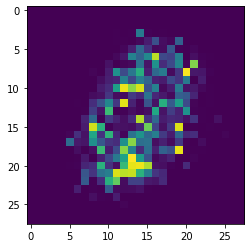

In [ ]:
plt.imshow(samples[200].reshape(28, 28))

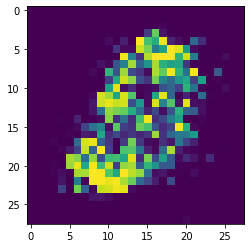

In [ ]:
plt.imshow(samples[300].reshape(28, 28))

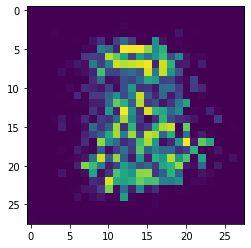

In [ ]:
plt.imshow(samples[400].reshape(28, 28))

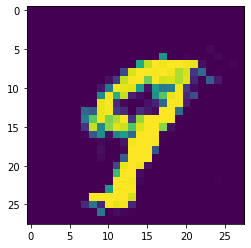

In [ ]:
plt.imshow(samples[499].reshape(28, 28))